In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
digits = datasets.load_digits()
X_img = digits.images
y = digits.target
n_samples = len(X_img)

In [3]:

# 평탄화 + 정규화(0~16 → 0~1)
X = X_img.reshape(n_samples, -1).astype("float32") / 16.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [5]:
# 학습/검증 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

In [6]:
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (1149, 64), Val: (288, 64), Test: (360, 64)


In [7]:
model = Sequential([
    Dense(128, activation="relu", input_shape=(64,)),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")   # 0~9
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
es = EarlyStopping(
    monitor="val_accuracy", patience=8, restore_best_weights=True
)

In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1776 - loss: 2.2255 - val_accuracy: 0.6528 - val_loss: 1.9349
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5031 - loss: 1.8804 - val_accuracy: 0.8021 - val_loss: 1.4520
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6418 - loss: 1.4482 - val_accuracy: 0.8646 - val_loss: 0.9661
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7425 - loss: 1.0657 - val_accuracy: 0.9062 - val_loss: 0.6483
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7928 - loss: 0.8001 - val_accuracy: 0.9132 - val_loss: 0.4748
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8153 - loss: 0.6363 - val_accuracy: 0.9271 - val_loss: 0.3864
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8600 - loss: 0.5191 - val_accuracy: 0.9306 - val_loss: 0.3121
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8861 - loss: 0.4165 - val_accuracy: 0.9444 - 

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n=== Test Accuracy (DL-MLP) : {test_acc:.4f} ===")


=== Test Accuracy (DL-MLP) : 0.9528 ===


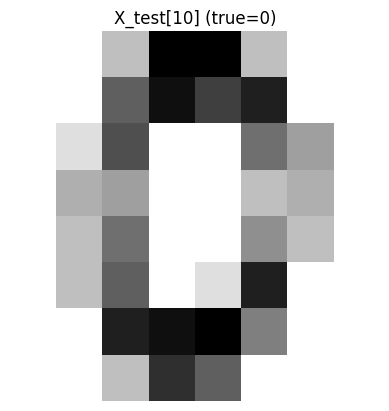

Prediction for X_test[10] -> 0 (true: 0)


In [13]:
idx = 10
plt.imshow(X_test[idx].reshape(8, 8)*16.0, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"X_test[{idx}] (true={y_test[idx]})")
plt.axis('off')
plt.show()

pred = np.argmax(model.predict(X_test[idx:idx+1], verbose=0), axis=1)[0]
print(f"Prediction for X_test[{idx}] -> {pred} (true: {y_test[idx]})")

In [14]:
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n",
      classification_report(y_test, y_pred, digits=4))


Accuracy: 0.9528

Confusion Matrix:
 [[35  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  0  1  0  1  0  1  2]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  1  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  5  0  0  0  0  0  1 29  0]
 [ 0  0  0  0  1  0  0  1  1 33]]

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.8611    0.8611    0.8611        36
           2     1.0000    1.0000    1.0000        35
           3     1.0000    1.0000    1.0000        37
           4     0.9000    1.0000    0.9474        36
           5     1.0000    0.9730    0.9863        37
           6     0.9722    0.9722    0.9722        36
           7     0.9474    1.0000    0.9730        36
           8     0.9355    0.8286    0.8788        35
           9     0.9167    0.9167    0.9167        36

    accura

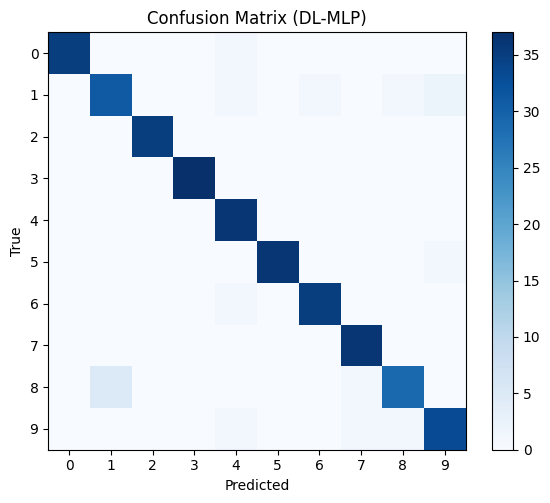

In [15]:
# 혼동행렬 시각화
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (DL-MLP)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()